## Importing modules

## BUILDING SYSTEMS DATA DRIVE PROJECT
### OCCUPANCY PREDICTION 
  This project aims to predict the occupancy of an office room. The data used for this project was taken here: 
https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+ 
  
  Experimental data used for binary classification (room occupancy) from Temperature, Humidity, Light and CO2. 
  Ground-truth occupancy was obtained from time stamped pictures that were taken every minute.

Attribute Information:

*   date time: year-month-day hour:minute:second;
*   Temperature: Celsius;
*   Relative Humidity: %;
*   Light: Lux;
*   CO2: ppm;
*   Humidity Ratio: kgwater-vapor/kg-air;
*   Occupancy: 0 or 1, 0 for not occupied, 1 for occupied status.

### Installing PyDrive

In [0]:
!pip install -U -q PyDrive


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


# After a specific amount of time Pydrive logs out, the enxt function checks for that and if it has happend trys log in again
# you will not to log in to your account just the first time, the next times it will be automatic, we will use this function later on.
def authorizeIfLoggedOut():
  try:
    file_list_GDrive = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()

  except:    
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



## Importing modules

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [0]:
print(drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList())

[GoogleDriveFile({'kind': 'drive#file', 'id': '1Sv0oZJuJw0gwfssnpQIuJ15x3lgfWoGS', 'etag': '"Q_i2RfdQZXXYrzCS85Kek3pR3ww/MTU3Njg0OTUxMjQ0MA"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1Sv0oZJuJw0gwfssnpQIuJ15x3lgfWoGS', 'alternateLink': 'https://drive.google.com/drive/folders/1Sv0oZJuJw0gwfssnpQIuJ15x3lgfWoGS', 'embedLink': 'https://drive.google.com/embeddedfolderview?id=1Sv0oZJuJw0gwfssnpQIuJ15x3lgfWoGS', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/application/vnd.google-apps.folder+shared', 'title': 'Data-Driven-Building-Simulation', 'mimeType': 'application/vnd.google-apps.folder', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2019-11-28T12:05:43.193Z', 'modifiedDate': '2019-12-20T13:45:12.440Z', 'lastViewedByMeDate': '2019-12-19T00:45:26.128Z', 'markedViewedByMeDate': '1970-01-01T00:00:00.000Z', 'sharedWithMeDate': '2019-11-28T13:22:05

In [0]:

# this will just check if we are logged out it logs in
authorizeIfLoggedOut()

file_list_GDrive = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()

for file1 in file_list_GDrive:  
    if "Buildings_Project" in file1['title']:
        Folder_ID_Buildings_Project= file1['id']


print(Folder_ID_Buildings_Project)

file_list_Buildings_Project = drive.ListFile({'q': "'%s' in parents and trashed=false" % Folder_ID_Buildings_Project}).GetList()

for file2 in file_list_Buildings_Project:  
    if "TOTAL_DATA.csv" in file2['title']:
        print ("TOTAL_DATA.csv exists")
        ID_TOTAL_DATA= file2['id']
        file_TOTAL_DATA = drive.CreateFile({'id': ID_TOTAL_DATA})
        file_TOTAL_DATA.GetContentFile('TOTAL_DATA.csv') 

  

1gqur3_xis8aSObhqthqyrZ-zMzqv9N_P
TOTAL_DATA.csv exists


## Importing datasets

In [0]:
DATA_DF_File = "TOTAL_DATA.csv"

DATA_DF = pd.read_csv(DATA_DF_File, sep = ",")
DATA_DF

,Time_Stamp,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:19,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,2/2/2015 14:19,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,2/2/2015 14:21,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,2/2/2015 14:22,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,2/2/2015 14:23,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
20555,2/18/2015 9:15,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,2/18/2015 9:16,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,2/18/2015 9:16,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,2/18/2015 9:17,20.8900,28.0225,418.750000,1632.000000,0.004279,1


## Creating time stamps
The program doesn't know yet that the index 'date' means a time related feature, so we make it into one:


In [0]:
DATA_DF_Old_Index = DATA_DF["Time_Stamp"]
DATA_DF_newIndex = pd.to_datetime(DATA_DF_Old_Index) 

# DATA_DF_newIndex
#then we need to insert the new time index into our table

DATA_DF["Time_Stamp"] = DATA_DF_newIndex

DATA_DF

,Time_Stamp,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:00,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1
20556,2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1
20557,2015-02-18 09:16:00,20.8900,27.7450,423.500000,1521.500000,0.004237,1
20558,2015-02-18 09:17:00,20.8900,28.0225,418.750000,1632.000000,0.004279,1


## Classification: Neural Network
From the features we'll try to classify wether the room is occupied or not.


### IMPORT MACHINE LEARNING LIBRARIES
Keras


In [0]:
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint   #how the model keeps the important data and discards unimportant data


Using TensorFlow backend.


First we will ignore the Time_Stamp feature, because for now we are not trying to predict, we are trying to classify. And also we disregard Humidity_Ratio because we already have a Humidity feature.



In [0]:
DATA_DF.pop("HumidityRatio")

New_DATA_DF = DATA_DF

New_DATA_DF

,Time_Stamp,Temperature,Humidity,Light,CO2,Occupancy
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,1
1,2015-02-02 14:19:00,23.7180,26.2900,578.400000,760.400000,1
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,1
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,1
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,1
...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,1
20556,2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,1
20557,2015-02-18 09:16:00,20.8900,27.7450,423.500000,1521.500000,1
20558,2015-02-18 09:17:00,20.8900,28.0225,418.750000,1632.000000,1


We shuffle the New_DATA_DF in order to our network not to get used to a specific order.

In [0]:
New_DATA_DF = New_DATA_DF.sample(frac=1).reset_index(drop = True)

New_DATA_DF


,Time_Stamp,Temperature,Humidity,Light,CO2,Occupancy
0,2015-02-05 23:19:00,20.39,21.290,0.0,445.333333,0
1,2015-02-07 16:04:00,21.20,19.200,36.5,437.500000,0
2,2015-02-14 12:10:00,20.84,34.545,74.0,511.000000,0
3,2015-02-13 10:53:00,23.39,24.750,774.0,647.400000,1
4,2015-02-08 07:47:00,19.20,31.100,0.0,431.000000,0
...,...,...,...,...,...,...
20555,2015-02-17 03:40:00,20.10,30.500,0.0,725.500000,0
20556,2015-02-05 15:13:00,22.60,28.290,525.0,1100.000000,1
20557,2015-02-07 08:10:00,19.60,19.500,14.0,451.000000,0
20558,2015-02-07 02:17:00,19.89,18.945,0.0,442.500000,0


Data Normalization - avoid over/underfitting due to heterogenic data


In [0]:
features = ["Temperature", "Humidity", "Light", "CO2"]

for i in features:
  New_DATA_DF[i] = (New_DATA_DF[i] - New_DATA_DF[i].mean()) / New_DATA_DF[i].std()

New_DATA_DF

,Time_Stamp,Temperature,Humidity,Light,CO2,Occupancy
0,2015-02-05 23:19:00,-0.489155,-1.277746,-0.621376,-0.787979,0
1,2015-02-07 16:04:00,0.278389,-1.697243,-0.447922,-0.813150,0
2,2015-02-14 12:10:00,-0.062742,1.382750,-0.269716,-0.576968,0
3,2015-02-13 10:53:00,2.353599,-0.583267,3.056792,-0.138667,1
4,2015-02-08 07:47:00,-1.616781,0.691282,-0.621376,-0.834037,0
...,...,...,...,...,...,...
20555,2015-02-17 03:40:00,-0.763954,0.570853,-0.621376,0.112296,0
20556,2015-02-05 15:13:00,1.605007,0.127269,1.873505,1.315697,1
20557,2015-02-07 08:10:00,-1.237747,-1.637028,-0.554845,-0.769770,0
20558,2015-02-07 02:17:00,-0.962947,-1.748426,-0.621376,-0.797083,0


List of lists separating each randomized line

In [0]:
x = [[New_DATA_DF["Temperature"][i], New_DATA_DF["Humidity"][i], New_DATA_DF["Light"][i], New_DATA_DF["CO2"][i]] for i in range(len(New_DATA_DF))]

# for loop for the range of the data frame with the length of the New_DATA_DF in order to access the i-th value in each column

y = [[New_DATA_DF["Occupancy"][i]] for i in range(len(New_DATA_DF))]

# x - each array is a line in x

x = np.array(x, dtype = np.dtype("float32"))

y = np.array(y, dtype = np.dtype("int32")) #occupancy are values where 1 is occupied and 0 is empty.


## Training and Testing Data Separation
We separate the data into two categories: Testing and Training. The larger the training size the more accurate our classification.



In [0]:
# len(New_DATA_DF)

training = 0.8*len(New_DATA_DF) # 80% for training 

training = int(training)
testing = len(New_DATA_DF)-training  # 20% for testing


x_training = x[:training]   #gets the numbers from start till the length of training
x_testing = x[training:]   #gets the numbers from training till end (length of testing)
#x_training

y_training = y[:training] 
y_testing = y[training:]


## CHECKPOINT
Our Neural Network now will be able to save the best training Epochs. Epochs are each time our Network ran and tested all the data. Everytime the Network tests the data, it checks wether the test was accurate or not, and then we tell it to keep the most accurate ones using the checkpoints.

In [0]:
checkpoint = ModelCheckpoint("./weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# ./weights.h5 -> this is the kind of file we are saving, called "weights"
# monitor = 'val_accuracy' -> parameter to monitor - validation and accuracy
# verose = 1 -> to tell me it saved the file


In [0]:
model = models.Sequential() # type of model - sequential model
model.add(layers.Dense(32, activation="relu", input_shape=(4,))) 
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"]) #compile the module - optimize function that modifies the tests (weights) each time

# each layer has Neurons that are connected to each other and each has an activation function (relu = rectified linear units, sigmoid = bc its binary)
# there are 3 layers, 1 - input, 2 - hidden (makes the tests), 3 - output








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## LET'S TRAIN
We call the training function "model.fit" in order to train our New Neural Network. The ouput "history" is going to show us how accurate our training is for each Epoch.

Overfitting - if the code gets too used to the test_data and doesn't generalize the features well, it will give a good performance on the training_data, but the validation_data will not show a good performance (exemple: data that it never seen before)

Underfitting - the code can't learn the relation between the features and the label, which results in very low accuracy values.

In [0]:
history = model.fit(x_training, y_training, epochs=100, batch_size=128, validation_data=(x_testing, y_testing), callbacks=[checkpoint])




Train on 16448 samples, validate on 4112 samples
Epoch 1/100





16448/16448 [==============================] - 1s 36us/step - loss: 0.2836 - acc: 0.9305 - val_loss: 0.0722 - val_acc: 0.9844
Epoch 2/100
16448/16448 [==============================] - 0s 12us/step - loss: 0.0532 - acc: 0.9869 - val_loss: 0.0495 - val_acc: 0.9878
Epoch 3/100
  128/16448 [..............................] - ETA: 0s - loss: 0.0491 - acc: 0.9922

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


16448/16448 [==============================] - 0s 12us/step - loss: 0.0463 - acc: 0.9885 - val_loss: 0.0482 - val_acc: 0.9883
Epoch 4/100
16448/16448 [==============================] - 0s 12us/step - loss: 0.0448 - acc: 0.9885 - val_loss: 0.0477 - val_acc: 0.9883
Epoch 5/100
16448/16448 [==============================] - 0s 11us/step - loss: 0.0440 - acc: 0.9889 - val_loss: 0.0471 - val_acc: 0.9881
Epoch 6/100
16448/16448 [==============================] - 0s 11us/step - loss: 0.0433 - acc: 0.9888 - val_loss: 0.0471 - val_acc: 0.9883
Epoch 7/100
16448/16448 [==============================] - 0s 11us/step - loss: 0.0427 - acc: 0.9889 - val_loss: 0.0465 - val_acc: 0.9881
Epoch 8/100
16448/16448 [==============================] - 0s 12us/step - loss: 0.0421 - acc: 0.9890 - val_loss: 0.0465 - val_acc: 0.9881
Epoch 9/100
16448/16448 [==============================] - 0s 11us/step - loss: 0.0417 - acc: 0.9889 - val_loss: 0.0469 - val_acc: 0.9886
Epoch 10/100
16448/16448 [====================

**Epoch 1000/1000**
16448/16448 [==============================] - 0s 24us/step - loss: 0.0210 - acc: 0.9927 - val_loss: 0.0322 - **val_acc: 0.9910**


## Plotting results


In [0]:
accuracy = history.history["acc"]
# inside 'history' we have a dictionary that gives us values for each Epoch test and we can plot their progression from Epoch 1 to 1000
# accuracy is the training part that was tested on the epoch and compared to the real value

val_accuracy = history.history["val_acc"]
# validation is the testing array that our network never seen before (outside the training) that will be what really checks the performance of our network 
# in the real case.


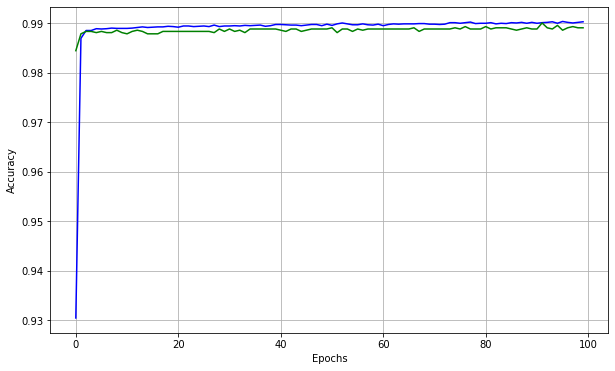

In [0]:
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(accuracy, "blue")
plt.plot(val_accuracy, "green")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

## OCCUPANCY CLASSIFICATION VERIFICATION:


In [0]:
# DATA_DF.loc["2015-02-02 14:19:00"]

In [0]:
def get_index_by_timestamp(df, time_stamp):
    index = DATA_DF[DATA_DF["Time_Stamp"] == time_stamp].index[0]
    return index

In [0]:
def predict_occupancy(df, index):

    test_x = np.array([[ df["Temperature"][index], df["Humidity"][index], df["Light"][index], df["CO2"][index]]])
    prediction = model.predict_classes(test_x)[0][0]
    if prediction == 1 : 
      print("Neural Network Prediction: Room is occupied")
    else : 
      print("Neural Network Prediction: Room is empty")

    real_occupancy = df["Occupancy"][index]
    if real_occupancy == 1:
      print ("Real occupancy: The room is occupied")
    else:
      print ("Real occupancy: room is empty")

In [0]:
index = get_index_by_timestamp(DATA_DF,"2015-02-15 15:15:00")

predict_occupancy(DATA_DF,index)

Neural Network Prediction: Room is occupied
Real occupancy: room is empty


## OCCUPANCY 2-WEEKS PREDICTION
The objective of this part of the code is to now make a prediction for the next two weeks regarding the occupancy of the room.

We need to import linear regression modes from "sklearn" to create a new Neural Network able to give us predictions.

## LINEAR REGRESSION - SPLIT

In [0]:
# we need to work with values that aren't strings so we need to make the time_stamp into a float
from datetime import datetime
def convert_to_stamp(time):
    timestamp = datetime.timestamp(time)
    return timestamp

In [0]:
DATA_DF.loc[:,"Time_Stamp_Float"] = [[convert_to_stamp(New_DATA_DF["Time_Stamp"][i])] for i in range(len(New_DATA_DF["Time_Stamp"]))]
#DATA_DF

In [0]:
DATA_DF_target = DATA_DF.loc[:,["Occupancy"]] #this way we have a data_frame

DATA_DF_features = DATA_DF.drop(columns= ["Time_Stamp","Occupancy"]) #we use as features everything except the string and our target

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(DATA_DF_features,DATA_DF_target, test_size = 0.2, random_state = 41234)

X_train

,Temperature,Humidity,Light,CO2,Time_Stamp_Float
16889,20.445,32.450000,0.00,672.500000,1.423865e+09
8510,19.290,27.700000,0.00,437.500000,1.424213e+09
18096,21.840,29.445000,444.25,933.750000,1.424033e+09
7048,20.200,23.356667,0.00,440.000000,1.423529e+09
362,21.075,23.315000,0.00,520.250000,1.423518e+09
...,...,...,...,...,...
4549,20.230,20.633333,0.00,435.000000,1.423560e+09
12583,21.200,28.090000,0.00,561.000000,1.423748e+09
10885,21.890,30.356667,421.50,797.500000,1.424139e+09
211,22.456,24.830000,419.00,807.800000,1.423819e+09


In [0]:
from sklearn import linear_model

linear_reg = linear_model.LinearRegression()
# linear_reg

In [0]:
linear_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predicted_linearReg_split = linear_reg.predict(X_test)
# predicted_linearReg_split

predicted_DF_linearReg_split = pd.DataFrame(predicted_linearReg_split, index = Y_test.index, columns = ["Predicted_Occupancy"])
predicted_DF_linearReg_split

#it will give the prediction of AC consumption on a specific date
predicted_DF_linearReg_split = predicted_DF_linearReg_split.join(Y_test) #you add the output to the table

predicted_DF_linearReg_split[predicted_DF_linearReg_split["Predicted_Occupancy"] <= 0] = 0
predicted_DF_linearReg_split[predicted_DF_linearReg_split["Predicted_Occupancy"] >= 1] = 1

Time = DATA_DF.loc[predicted_DF_linearReg_split.index,"Time_Stamp"]
predicted_DF_linearReg_split.insert(0, "Time_Stamp", Time)

predicted_DF_linearReg_split

,Time_Stamp,Predicted_Occupancy,Occupancy
14807,2015-02-14 09:27:00,0.028726,0
6063,2015-02-07 02:29:00,0.000000,0
9770,2015-02-09 16:15:00,1.000000,1
815,2015-02-03 03:53:00,0.000000,0
12093,2015-02-12 12:13:00,0.273157,0
...,...,...,...
20109,2015-02-18 01:49:00,0.261575,0
3722,2015-02-05 11:28:00,0.829512,1
9882,2015-02-09 18:08:00,0.109999,0
18326,2015-02-16 20:06:00,0.016083,0


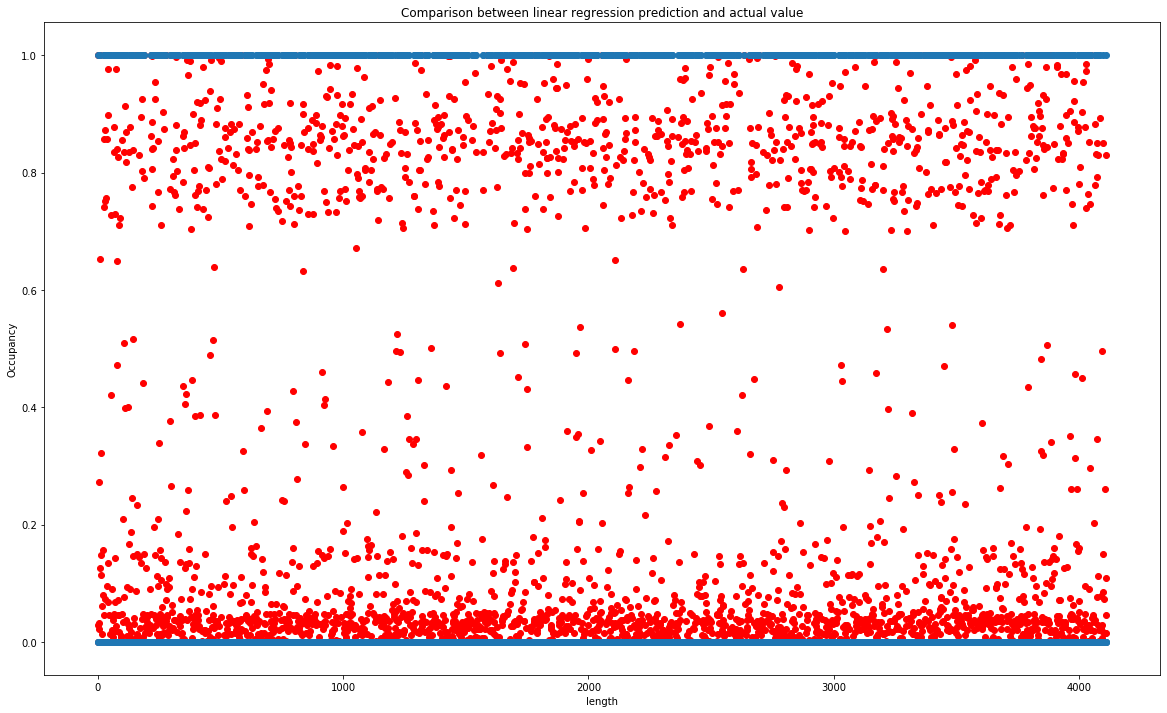

In [0]:
predicted =[]
actual = []
for index,row in predicted_DF_linearReg_split.iterrows():
  predicted.append( row["Predicted_Occupancy"])
  actual.append( row["Occupancy"])

plt.figure(figsize = (20,12))
plt.title("Comparison between linear regression prediction and actual value")
plt.scatter(range(len(predicted)), predicted, c="r") 
plt.scatter(range(len(actual)), actual)
plt.xlabel("length")
plt.ylabel("Occupancy")
plt.show()

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE_linearReg_split = mean_absolute_error(predicted_linearReg_split, Y_test)
MSE_linearReg_split = mean_squared_error(predicted_linearReg_split, Y_test)
Mr2_linearReg_split = r2_score(predicted_linearReg_split, Y_test)

print ("MAE :" +str(MAE_linearReg_split))
print ("MSE :" +str(MSE_linearReg_split))
print("Mr2 :" +str(Mr2_linearReg_split))

MAE :0.09229028283841711
MSE :0.02255208067527324
Mr2 :0.8521777907509003


## CROSS VALIDATION

In [0]:
from sklearn.model_selection import cross_val_predict

predicted_linearReg_CV = cross_val_predict(linear_reg,DATA_DF_features,DATA_DF_target, cv = 1200)

In [0]:
predicted_DF_linearReg_CV = pd.DataFrame(predicted_linearReg_CV, index = DATA_DF_target.index, columns = ["Predicted_Occupancy"])

#it will give the prediction of AC consumption on a specific date for 300 rows at a time
predicted_DF_linearReg_CV = predicted_DF_linearReg_CV.join(DATA_DF_target) #you add the output to the table

predicted_DF_linearReg_CV[predicted_DF_linearReg_CV["Predicted_Occupancy"] <= 0] = 0
predicted_DF_linearReg_CV[predicted_DF_linearReg_CV["Predicted_Occupancy"] >= 1] = 1

Time_CV = DATA_DF.loc[predicted_DF_linearReg_CV.index,"Time_Stamp"]
predicted_DF_linearReg_CV.insert(0, "Time_Stamp", Time_CV)


predicted_DF_linearReg_CV[predicted_DF_linearReg_CV["Occupancy"] == 0]

,Time_Stamp,Predicted_Occupancy,Occupancy
195,2015-02-02 17:34:00,0.720440,0
196,2015-02-02 17:35:00,0.708308,0
197,2015-02-02 17:36:00,0.711473,0
198,2015-02-02 17:37:00,0.720421,0
199,2015-02-02 17:38:00,0.725227,0
...,...,...,...
20546,2015-02-18 09:06:00,0.153224,0
20547,2015-02-18 09:07:00,0.152096,0
20548,2015-02-18 09:08:00,0.160945,0
20549,2015-02-18 09:08:00,0.154874,0


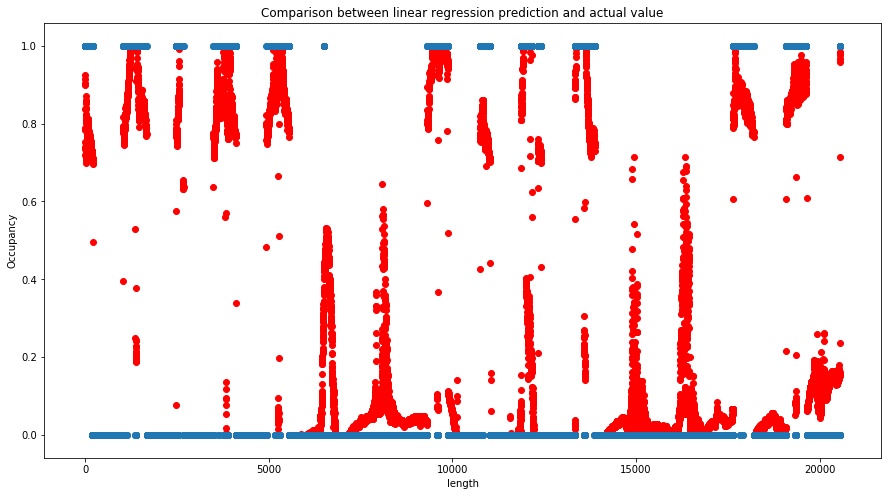

In [0]:
predicted =[]
actual = []
for index,row in predicted_DF_linearReg_CV.iterrows():
  predicted.append( row["Predicted_Occupancy"])
  actual.append( row["Occupancy"])

plt.figure(figsize = (15,8))
plt.title("Comparison between linear regression prediction and actual value")
plt.scatter(range(len(predicted)), predicted, c="r") 
plt.scatter(range(len(actual)), actual)
plt.xlabel("length")
plt.ylabel("Occupancy")
plt.show()

In [0]:
MAE_linearReg_CV = mean_absolute_error(predicted_linearReg_CV, DATA_DF_target)
MSE_linearReg_CV = mean_squared_error(predicted_linearReg_CV, DATA_DF_target)
Mr2_linearReg_CV = r2_score(predicted_linearReg_CV, DATA_DF_target)

print ("MAE_CV :" +str(MAE_linearReg_CV))
print ("MSE_CV :" +str(MSE_linearReg_CV))
print("Mr2_CV :" +str(Mr2_linearReg_CV))

MAE_CV :0.09269922134182103
MSE_CV :0.02442146780202939
Mr2_CV :0.8409531208396086


## RANDOM FORESTS

In [0]:
from sklearn.ensemble import RandomForestRegressor

RF_reg = RandomForestRegressor()

predicted_RF_reg_CV = cross_val_predict(RF_reg,DATA_DF_features,DATA_DF_target, cv = 300)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:876: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:876: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_trai

In [0]:
predicted_DF_RF_reg_CV = pd.DataFrame(predicted_RF_reg_CV, index = DATA_DF_target.index, columns = ["Predicted_Occupancy"])

#it will give the prediction of AC consumption on a specific date for 10 rows at a time
predicted_DF_RF_reg_CV = predicted_DF_RF_reg_CV.join(DATA_DF_target) #you add the output to the table

Time_RF = DATA_DF.loc[predicted_DF_RF_reg_CV.index,"Time_Stamp"]
predicted_DF_RF_reg_CV.insert(0, "Time_Stamp", Time_RF)

predicted_DF_RF_reg_CV[predicted_DF_RF_reg_CV["Occupancy"] == 0]


,Time_Stamp,Predicted_Occupancy,Occupancy
195,2015-02-02 17:34:00,0.7,0
196,2015-02-02 17:35:00,0.3,0
197,2015-02-02 17:36:00,0.7,0
198,2015-02-02 17:37:00,0.6,0
199,2015-02-02 17:38:00,0.7,0
...,...,...,...
20546,2015-02-18 09:06:00,0.0,0
20547,2015-02-18 09:07:00,0.0,0
20548,2015-02-18 09:08:00,0.0,0
20549,2015-02-18 09:08:00,0.0,0


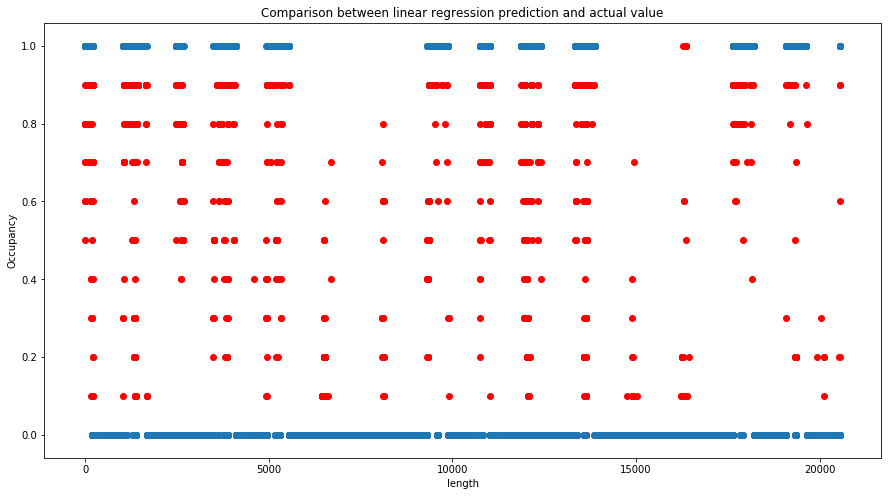

In [0]:
predicted =[]
actual = []
for index,row in predicted_DF_RF_reg_CV.iterrows():
  predicted.append( row["Predicted_Occupancy"])
  actual.append( row["Occupancy"])

plt.figure(figsize = (15,8))
plt.title("Comparison between linear regression prediction and actual value")
plt.scatter(range(len(predicted)), predicted, c="r") 
plt.scatter(range(len(actual)), actual)
plt.xlabel("length")
plt.ylabel("Occupancy")
plt.show()

In [0]:
MAE_RF_reg_CV = mean_absolute_error(predicted_RF_reg_CV, DATA_DF_target)
MSE_RF_reg_CV = mean_squared_error(predicted_RF_reg_CV, DATA_DF_target)
Mr2_RF_reg_CV = r2_score(predicted_RF_reg_CV, DATA_DF_target)

print ("MAE_RF :" +str(MAE_RF_reg_CV))
print ("MSE_RF :" +str(MSE_RF_reg_CV))
print("Mr2_RF :" +str(Mr2_RF_reg_CV))

MAE_RF :0.02446498054474708
MSE_RF :0.013797665369649806
Mr2_RF :0.9165850880268429


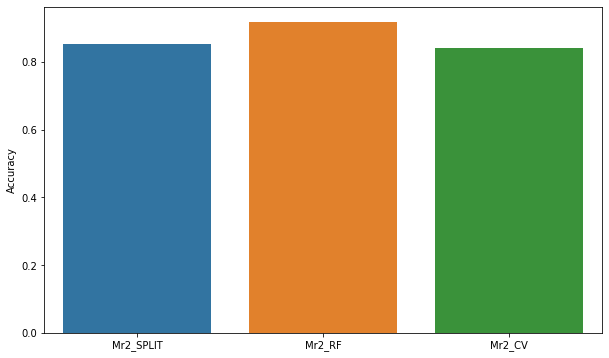

In [0]:
plt.figure(figsize = (10,6))
plt.ylabel("Accuracy")
sns.barplot(x = ["Mr2_SPLIT","Mr2_RF", "Mr2_CV"] , y = [Mr2_linearReg_split, Mr2_RF_reg_CV, Mr2_linearReg_CV])
plt.show()

### Creating Time_Stamps that are float values so we can work with them. 
(we can't work with strings on our linear regression)
https://www.programiz.com/python-programming/datetime/timestamp-datetime
Python timestamp to datetime and vice-versa.

We need to train each feature of our data_set indivualy:

In [0]:
#temperature_train = [[New_DATA_DF["Temperature"][i]] for i in range(0,len(New_DATA_DF["Time_Stamp"]))] #we get each value from each timestamp 

time_stamp_train = [[convert_to_stamp(New_DATA_DF["Time_Stamp"][i])] for i in range(len(New_DATA_DF["Time_Stamp"]))]

#temperature_train = np.array(temperature_train)
#time_stamp_train = np.array(time_stamp_train)

# time_stamp_train

But this is too much work, it's better in a loop:

In [0]:
linear_regression_data = {} #dictionary

In [0]:
for feature in features:
    linear_regression_data[feature] = [[New_DATA_DF[feature][i]] for i in range(0,len(New_DATA_DF[feature]))]
    #in the dictionary we want to put each feature as a list of lists in order to make each value into a readable value by the algorithm

print (linear_regression_data) #linear_regression_data.keys

{'Temperature': [[-0.4891548812442719], [0.2783887795953821], [-0.062741736333353], [2.353599418161859], [-1.6167807533420384], [-0.19540360363897297], [-0.3849205569327144], [1.2259735460640924], [1.2259735460640924], [-0.4891548812442719], [-0.8113337018436333], [-0.8587129401670694], [-0.5839133578911443], [0.18363030294851312], [1.0017118148412167], [-0.5839133578911443], [-0.8587129401670694], [-0.8587129401670694], [-0.11012097465678919], [0.9322222684587934], [-0.0390521171716366], [-0.8587129401670694], [0.7806087058237996], [2.0787998358859334], [-0.3849205569327144], [-0.4891548812442719], [-0.5839133578911443], [1.1312150694172234], [0.7521811628297372], [0.7521811628297372], [-1.5314981243598544], [0.5626642095359958], [-0.290162080285842], [-1.7115392299889074], [-0.21909322280068938], [2.4578337424734165], [1.1312150694172234], [-0.11012097465678919], [0.5626642095359958], [0.3636714085775659], [-0.19540360363897297], [1.036456592770351], [-0.7323683077965247], [-1.531498

Now we'll create a linear regression model for each feature.

In [0]:
linear_regression_models = {}

for feature in features: 
  linear_regression_models[feature] = linear_model.LinearRegression()
  # Create linear regression object
  
  linear_regression_models[feature].fit(time_stamp_train, linear_regression_data[feature])
  # Train the model using the training sets

  print (linear_regression_models[feature].score(linear_regression_data[feature]))


TypeError: ignored

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE_linearReg_split = mean_absolute_error(linear_regression_prediction, time_stamp_train)
MSE_linearReg_split = mean_squared_error(linear_regression_prediction, time_stamp_train)
Mr2_linearReg_split = r2_score(linear_regression_prediction, time_stamp_train)

print ("MAE :" +str(MAE_linearReg_split))
print ("MSE :" +str(MSE_linearReg_split))
print("Mr2 :" +str(Mr2_linearReg_split))

In [0]:
test = np.asarray([["1422893940.0"]], dtype=np.dtype("float64"))

regr.score(time_stamp_train, temperature_train)
regr.predict(test)
